# Cyclic Coordinate Search

*Cyclic Coordinate Search* also known as *coordinate descent* or *taxicab search*, simply alternates between directions for this line search.The search starts from initial $x^{(1)}$ and optimizes the first input:

\begin{align}
  x^{(2)} = arg min_{x^1} f(x_1,x_2^{(1)},x_3^{(1)},\ldots,x_n^{(1)})
\end{align}

Having solved this,it optimizes the next co-ordinate:

\begin{align}
  x^{(3)} = arg min_{x^1} f(x_1^{(2)},x_2,x_3^{(2)},\ldots,x_n^{(2)})
\end{align}

This process is equivalent  to doing a sequence of line searches along the set of $n$ basis vectors, where the $i$th basis vector is all zero except the $i$th component. For example, the third basis function, denoted $e^{(3)}$, in a four-dimensional space is :

\begin{align}
  e^{(3)} = [0,0,1,0]
\end{align}

Like steepest descent, cyclic coordinate search is guranteed either to improve or to remain the same with each direction. No significant improvement after a full cycle over all co-ordinates indicates the method has converged.

**Algorithm**
```
function cyclic_coordinate_descent(f,x,eps)
  delta, n = Inf, length(x)
  while abs(delta) > eps
    x' = copy(x)
    for i  in 1:n
      d = basis(i,n)
      x = line_search(f,x,d)
    end
    delta = norm(x'-x)
  end
  return x
end
```

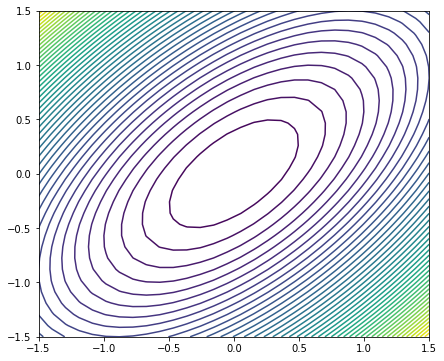

In [9]:
# Contour plot of the function on which cyclic_coordinate_descent algorithm will be implemented
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x1 = np.linspace(-1.5,1.5,30)
x2 = np.linspace(-1.5,1.5,30)

# Creating 2-D grid of features
[X, Y] = np.meshgrid(x1,x2)
Z = 5*X**2 -6*X*Y + 5*Y**2
plt.figure(figsize=(7,6))
plt.contour(X,Y,Z,55)
plt.show()


## Line Search

In [ ]:
# function to find the initial bracket of the objective function 
# Have directly specified the simplified version of the function
def f(alpha,x,d):
  
  return (5*(x[0]-alpha*d[0])**2 - 6*(x[0]-alpha*d[0])*(x[1]-alpha*d[1]) +5*(x[1]-alpha*d[1])**2)
 
# derivative of the objective function 

def grad_alpha(f,alpha,x,d):
  h = 0.00001
  return (f(alpha+h,x,d)-f(alpha,x,d))/h

In [ ]:
def bracket_minimum(alpha,x,d,s,k):

  a, fa = alpha,  f(alpha,x,d)
  b, fb = a+s , f(a+s,x,d)

  if fb > fa:
    a,b = b,a 
    fa, fb = fb,fb
    s = -s

  while True:
    c, fc = b+s, f(b+s,x,d)
    if fc > fb:
      if a < c:
        return [a,c]
      else:
        return [c,a]
    a,fa,b,fb = b,fb,c,fc
    s*=k
def bisection_root_finding(a,b,x,d,eps):

  if a > b : 
    a,b = b,a 
  fa, fb = grad_alpha(f,a,x,d), grad_alpha(f,b,x,d)
  if fa == 0:
    b = a
    return (a)

  if fb == 0:
    a = b
    return (b)
  iter = 0
 
  while abs(b - a) > eps:
    iter +=1
    c = (a+b)/2
    y = grad_alpha(f,c,x,d)

    if y == 0:
      a,b = c, c
      break

    if np.sign(y)  < 0  :
      a = c
    else:
      b = c

  return (a+b)/2

def line_search(alpha,x,d):
  
  a,b = bracket_minimum(alpha,x,d,s=0.01,k=2.0)
  alpha = bisection_root_finding(a,b,x,d,eps=1e-5)
  return alpha

## Cyclic Coordinate Descent Algorithm

In [ ]:
def cyclic_coordinate_descent(x,alpha,eps):
  delta, n ,arr_x = np.inf, len(x), []

  d = np.zeros(n)
  while abs(delta)> eps:
    x1 = np.copy(x)
    arr_x.append(x1)
    for i in range(0,n):
      d[i] = 1
      alpha = line_search(alpha,x1,d)
      x = x - alpha*d
      arr_x.append(x)
      d = np.zeros(n)
    delta = np.linalg.norm(x-x1)
    
  return x,arr_x

In [ ]:
x = [-1,-1.5]
eps = 1e-5
alpha = 3
x, lst_x = cyclic_coordinate_descent(x,alpha,eps)
print(" The minimum value of the function 5x^2 -6xy +5y^2 :",x)

 The minimum value of the function 5x^2 -6xy +5y^2 : [9.76562501e-06 1.46484375e-05]


## Graphical plot of the successive values of x

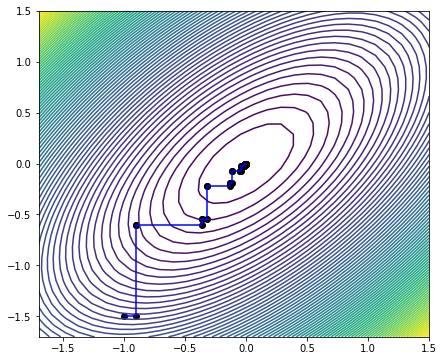

In [ ]:
# Plot of the successive points of 'x' as we progress in the direction of the steepest descent.

x1 = np.linspace(-1.7,1.5,30)
x2 = np.linspace(-1.7,1.5,30)
arr = pd.DataFrame(lst_x)
# Creating 2-D grid of features
[X, Y] = np.meshgrid(x1,x2)
Z = 5*X**2 -6*X*Y + 5*Y**2

a,b  = arr[0],arr[1]
plt.figure(figsize=(7,6))
plt.scatter(a,b,color="black")
plt.contour(X,Y,Z,90)
plt.plot(a,b,color="blue")
plt.show()